# Problem statement

The proliferation of social media enables people to express their opinions widely online. However, at the same time, this has resulted in the emergence of conflict and hate, making online environments uninviting for users. Although researchers have found that hate is a problem across multiple platforms, there is a lack of models for online hate detection.
Online hate, described as abusive language, aggression, cyberbullying, hatefulness and many others has been identified as a major threat on online social media platforms. Social media platforms are the most prominent grounds for such toxic behaviour.   
There has been a remarkable increase in the cases of cyberbullying and trolls on various social media platforms. Many celebrities and influences are facing backlashes from people and have to come across hateful and offensive comments. This can take a toll on anyone and affect them mentally leading to depression, mental illness, self-hatred and suicidal thoughts.    
Internet comments are bastions of hatred and vitriol. While online anonymity has provided a new outlet for aggression and hate speech, machine learning can be used to fight it. The problem we sought to solve was the tagging of internet comments that are aggressive towards other users. This means that insults to third parties such as celebrities will be tagged as unoffensive, but “u are an idiot” is clearly offensive.

# Objective

We will build a prototype of online hate and abuse comment classifier which can classify those comments so that it can be controlled and restricted from spreading hatred and cyberbullying. 

# Importing libraries

In [48]:
!pip install wordcloud

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

import sklearn
import random

import operator
import math
import tqdm

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import string
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import wordnet as wn
from nltk.stem import WordNetLemmatizer

from wordcloud import WordCloud


from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.multiclass import OneVsRestClassifier

from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier



import pandas as pd 
import numpy as np 
import string
import nltk
from collections import Counter
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize

#nltk.download('vader_lexicon')
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import plot_confusion_matrix

from sklearn.model_selection import cross_val_score

import joblib

[nltk_data] Downloading package stopwords to C:\Users\Dinesh
[nltk_data]     Mutha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Dinesh
[nltk_data]     Mutha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Importing Data set

In [3]:
#Importing data set

df = pd.read_csv('train.csv')

df.head(5)

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


It can be seen that 'id' column is of no importance in making predictions since it is just serial number, hence we drop the column. Only 'comment_text' variable is the input variable and rest all are output labels in the above dataset. It consists of 159571 rows and 8 columns.

In [4]:
#drop "id" column

df.drop('id', axis = 1, inplace = True)

# Checking Null Values

In [5]:
#Checking null values 

df.isnull().sum()

comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

<AxesSubplot:>

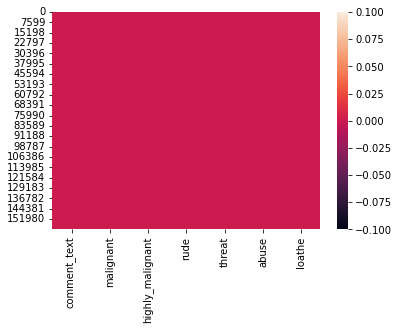

In [6]:
# Visualise null values using heatmap

sns.heatmap(df.isnull())

We cannot find any null values above.

# Data Visualization

malignant


0    144277
1     15294
Name: malignant, dtype: int64


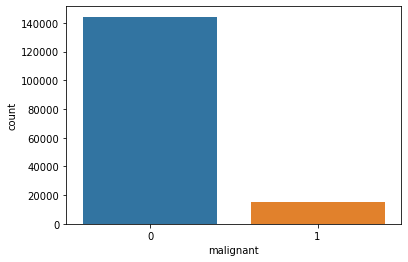

highly_malignant


0    157976
1      1595
Name: highly_malignant, dtype: int64


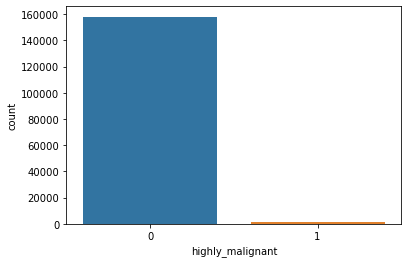

loathe


0    158166
1      1405
Name: loathe, dtype: int64


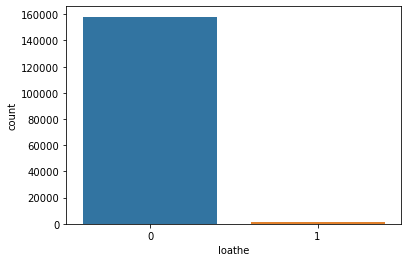

rude


0    151122
1      8449
Name: rude, dtype: int64


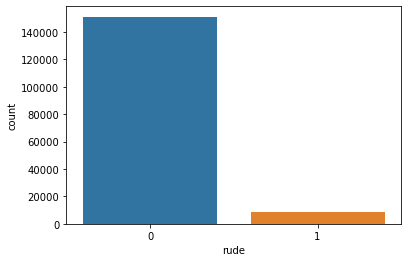

abuse


0    151694
1      7877
Name: abuse, dtype: int64


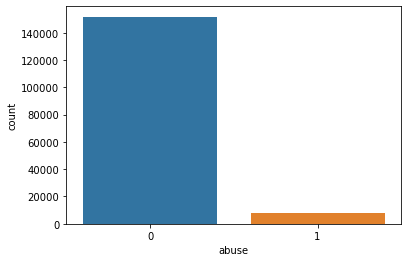

threat


0    159093
1       478
Name: threat, dtype: int64


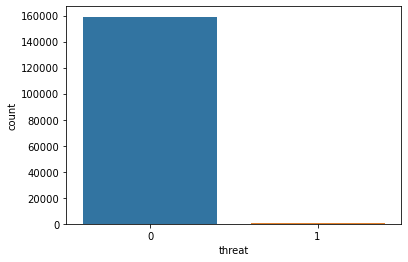

In [7]:
#Visualizing categorical data using count plot

col = ['malignant', 'highly_malignant', 'loathe', 'rude', 'abuse', 'threat']

for i in col:
    print(i)
    print("\n")
    print(df[i].value_counts())
    sns.countplot(df[i])
    plt.show()

Observation

It can be seen that all our target variables have categorical data which comprises of either '0' i.e 'NO' or '1' i.e 'YES'.

'0' indicates that the particular entry does not contain any malignant data and '1' indicates that the data has malignant comments.

'malignant' variable consists of 144277 number of entries belonging to the '0' category and 15294 from the '1' category.

Column 'highly_malignant' has 157976 rows of entries that are not malignant and 1595 rows having highly malignant data.

'loathe' column consists of 1405 rows of loathe data and 158166 rows of data which are not loathe.

Variable 'rude' comprises of 151122 no. of data which are not rude and 8449 entries of data that are rude.

'abuse' column has 151694 entries which does not have any abusive data and 7877 rows consists of abusive content.

478 entries consists of threat messages and 159093 entries that does not comprise of any threat messages.

From the above information, it can be seen that the data set is highly imbalanced.

# Data Description

In [8]:
# Shape of data set.

df.shape

(159571, 7)

Data set now consists of 159571 rows and 7 columns.

In [9]:
# fetching data information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   comment_text      159571 non-null  object
 1   malignant         159571 non-null  int64 
 2   highly_malignant  159571 non-null  int64 
 3   rude              159571 non-null  int64 
 4   threat            159571 non-null  int64 
 5   abuse             159571 non-null  int64 
 6   loathe            159571 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 8.5+ MB


This gives a small representation of how our actual data looks like.

In [10]:
# data description

df.describe()

,malignant,highly_malignant,rude,threat,abuse,loathe
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The standard deviation of our data is not large because it consists of the categorical data. The min and max values are 0 & 1 respectively.

# Correlation of Columns

In [11]:
#Finding correlations between variables

df.corr()

,malignant,highly_malignant,rude,threat,abuse,loathe
malignant,1.000000,0.308619,0.676515,0.157058,0.647518,0.266009
highly_malignant,0.308619,1.000000,0.403014,0.123601,0.375807,0.201600
rude,0.676515,0.403014,1.000000,0.141179,0.741272,0.286867
threat,0.157058,0.123601,0.141179,1.000000,0.150022,0.115128
abuse,0.647518,0.375807,0.741272,0.150022,1.000000,0.337736
loathe,0.266009,0.201600,0.286867,0.115128,0.337736,1.000000


<AxesSubplot:>

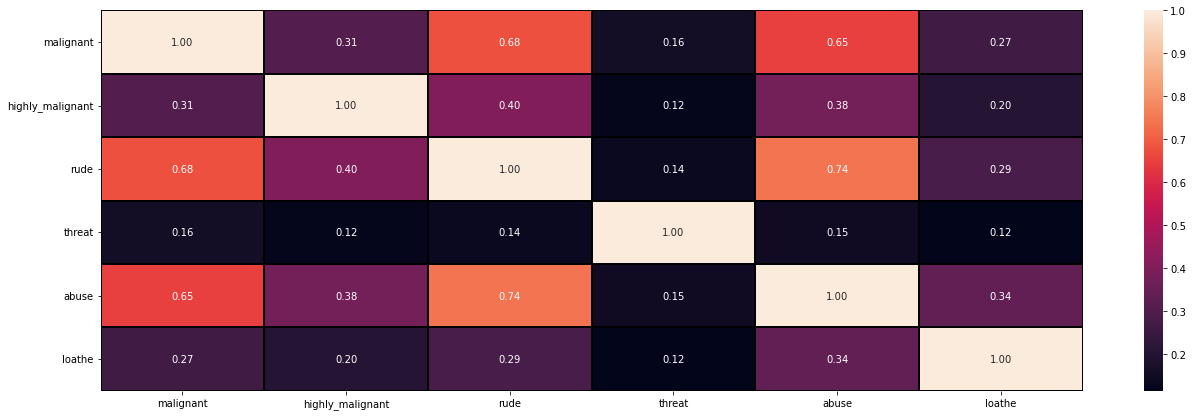

In [12]:
#Plotting correlation of input features with the target Variable

plt.figure(figsize = (22, 7))

sns.heatmap(df.corr(), annot = True, linewidths = 0.1, linecolor = 'black', fmt = '0.2f')

The highest positive correlation is found between variable 'rude' & 'abuse', 'rude' & 'malignant' and 'abuse' & 'malignant'.

No negative correlations present between variables.

# Checking Skewness

In [13]:
# finding skewness in data

df.skew()

malignant            2.745854
highly_malignant     9.851722
rude                 3.992817
threat              18.189001
abuse                4.160540
loathe              10.515923
dtype: float64

High skewness is observed due to imbalanced nature of dataset but we do not consider outliers for this project since it comprises of all categorical data.

# Text Pre-Processing

In [14]:
# New column for Length of texts present in the 'comment_text' column of the original dataframe

df['length'] = df['comment_text'].str.len()

df.head(5)

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67


A new column length is added to the data set indicating the length of text in each row.

# Convert all texts into lower case and unique data into text language

In [15]:
# Convert all messages to lower case
df['comment_text'] = df['comment_text'].str.lower()

# Replace email addresses with 'email'
df['comment_text'] = df['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'emailaddress')

# Replace URLs with 'webaddress'
df['comment_text'] = df['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')

# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
df['comment_text'] = df['comment_text'].str.replace(r'£|\$', 'dollers')
    
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
df['comment_text'] = df['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phonenumber')

    
# Replace numbers with 'numbr'
df['comment_text'] = df['comment_text'].str.replace(r'\d+(\.\d+)?', 'numbr')

# Removing Punctuations

In [16]:
#Defining punctuations and printing them

punc = string.punctuation

punc

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [17]:
# For removing punctuations

df['comment_text'] = df['comment_text'].str.replace(r'[^\w\d\s]', ' ') #removing punctuations

In [18]:
# Visualizing data frame to check if the punctuations are removed

df.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length
0,explanation\nwhy the edits made under my usern...,0,0,0,0,0,0,264
1,d aww he matches this background colour i m s...,0,0,0,0,0,0,112
2,hey man i m really not trying to edit war it...,0,0,0,0,0,0,233
3,\nmore\ni can t make any real suggestions on ...,0,0,0,0,0,0,622
4,you sir are my hero any chance you remember...,0,0,0,0,0,0,67


It is clearly observed that all texts have been converted into lower case and the punctuations have been removed.

# Removing Stopwords

In [19]:
# Printing standard stopword list provided by nltk.corpus

print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [20]:
# Set our own stopwords

stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])

In [21]:
# stopwords removal

df['comment_text'] = df['comment_text'].apply(lambda x: ' '.join(
    word for word in x.split() if word not in stop_words and len(word)>2))

In [22]:
# Verifying modifications

df.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length
0,explanation edits made username hardcore metal...,0,0,0,0,0,0,264
1,aww matches background colour seemingly stuck ...,0,0,0,0,0,0,112
2,hey man really trying edit war guy constantly ...,0,0,0,0,0,0,233
3,make real suggestions improvement wondered sec...,0,0,0,0,0,0,622
4,sir hero chance remember page,0,0,0,0,0,0,67


When compared with the old data frame, we can notice that the stopwords and the words less than length 2 have been removed from the texts present in the column 'comment_text'.

# Tokenization and Lemmatization of Texts

In [30]:
lemma = WordNetLemmatizer()

df['comment_text'] = df['comment_text'].apply(lambda x: ' '.join(
 lemma.lemmatize(i) for i in x.split()))

lemma

<WordNetLemmatizer>

# Creating new length of texts present in data set

In [24]:
# Creating column for length of modified texts

df['clean_length'] = df.comment_text.str.len()

df.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length,clean_length
0,explanation edits made username hardcore metal...,0,0,0,0,0,0,264,168
1,aww match background colour seemingly stuck th...,0,0,0,0,0,0,112,91
2,hey man really trying edit war guy constantly ...,0,0,0,0,0,0,233,141
3,make real suggestion improvement wondered sect...,0,0,0,0,0,0,622,359
4,sir hero chance remember page,0,0,0,0,0,0,67,29


Comparing Original & New length of texts

In [25]:
# Total length removal

print ('Original Length', df.length.sum())

print ('Clean Length', df.clean_length.sum())

Original Length 62893130
Clean Length 39629308


Clean length is 60% of the Original length.

# DataFrame of Target Variables

In [26]:
hf = df.drop(['length','clean_length','comment_text'], axis = 1)

hf.head()

,malignant,highly_malignant,rude,threat,abuse,loathe
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


# Visualizing most appearing words in each Target Variable

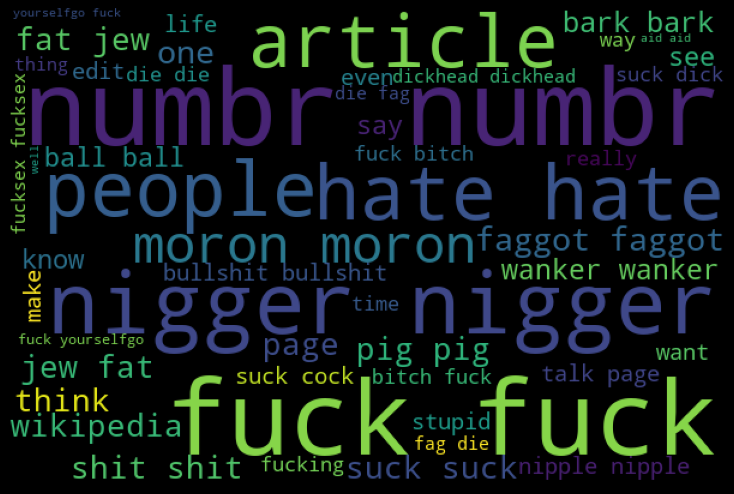

In [27]:
# Getting sense of cloud words which are offensive

hams = df['comment_text'][df['malignant']==1]

spam_cloud = WordCloud(width = 600, height = 400, background_color = 'black', max_words = 50).generate(' '.join(hams))

plt.figure(figsize = (10, 8), facecolor = 'k')

plt.imshow(spam_cloud)

plt.axis('off')

plt.tight_layout(pad = 0)

plt.show()

Some of the 50 most frequently appearing words in "comment_text" column in relation to "malignant" target variable are 'nigger', 'fuck', 'suck', 'hate', 'shit', 'bark', 'bullshit', 'numbr', 'faggot', etc.

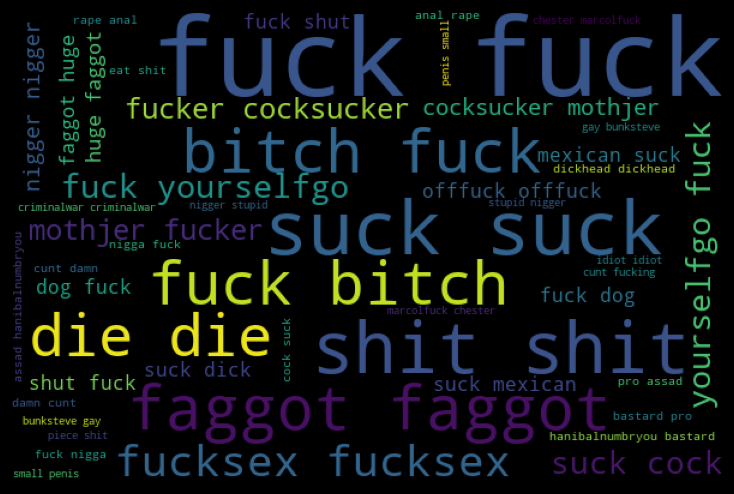

In [28]:
# Getting sense of cloud words which are offensive

from wordcloud import WordCloud

hams = df['comment_text'][df['highly_malignant']==1]

spam_cloud = WordCloud(width=600, height = 400, background_color = 'black', max_words = 50).generate(' '.join(hams))

plt.figure(figsize = (10, 8), facecolor = 'k')

plt.imshow(spam_cloud)

plt.axis('off')

plt.tight_layout(pad = 0)

plt.show()

Most commonly accuring words in column 'comment_text' in relation to 'highly_malignant' target variable are 'fuck', 'bitch', 'fucksex', 'faggot', 'cock', 'dick', 'nigger', 'bastard', etc.

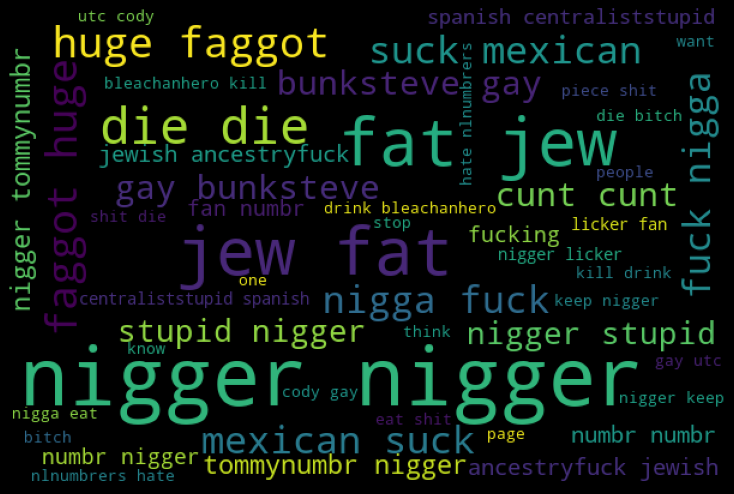

In [29]:
#Getting sense of cloud words which are offensive

from wordcloud import WordCloud

hams = df['comment_text'][df['loathe']==1]

spam_cloud = WordCloud(width = 600, height = 400, background_color = 'black', max_words = 50).generate(' '.join(hams))

plt.figure(figsize = (10, 8), facecolor = 'k')

plt.imshow(spam_cloud)

plt.axis('off')

plt.tight_layout(pad=0)

plt.show()

Some of the 50 most frequently appearing words in 'comment_text' column in relation to 'loathe' target variable are 'die', 'jew', 'mexican', 'gay', 'fat', 'stupid', 'cunt', 'bunksteve', etc.

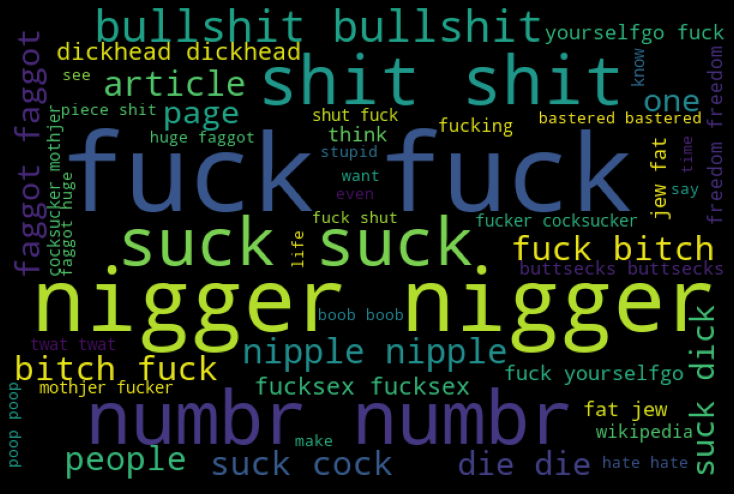

In [31]:
#Getting sense of cloud words which are offensive

from wordcloud import WordCloud

hams = df['comment_text'][df['rude']==1]

spam_cloud = WordCloud(width=600, height = 400, background_color = 'black', max_words = 50).generate(' '.join(hams))

plt.figure(figsize = (10, 8), facecolor = 'k')

plt.imshow(spam_cloud)

plt.axis('off')

plt.tight_layout(pad = 0)

plt.show()

Most commonly accuring words in column 'comment_text' in relation to 'rude' target variable are 'fuck', 'shit', 'suck', 'nigger', 'nipple', 'numbr', 'dickhead', 'fake', 'shut', etc.

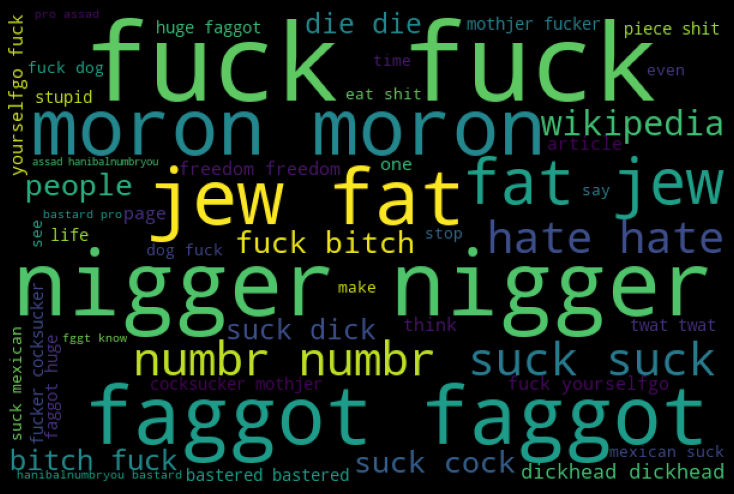

In [32]:
# Getting sense of cloud words which are offensive

from wordcloud import WordCloud

hams = df['comment_text'][df['abuse']==1]

spam_cloud = WordCloud(width = 600, height = 400, background_color = 'black', max_words = 50).generate(' '.join(hams))

plt.figure(figsize = (10, 8), facecolor = 'k')

plt.imshow(spam_cloud)

plt.axis('off')

plt.tight_layout(pad=0)

plt.show()

Some of the 50 most frequently appearing words in 'comment_text' column in relation to 'abuse' target variable are 'fuck', 'moron', 'jew', 'shit', 'article', 'hate', 'bitch', 'suck', 'mexican', 'dog', 'dickhead', etc.

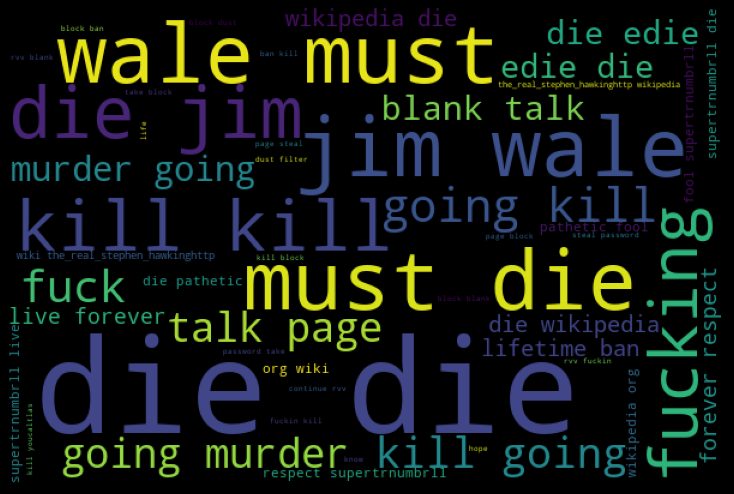

In [33]:
# Getting sense of cloud words which are offensive

from wordcloud import WordCloud

hams = df['comment_text'][df['threat']==1]

spam_cloud = WordCloud(width = 600, height = 400, background_color = 'black',max_words = 50).generate(' '.join(hams))

plt.figure(figsize = (10, 8), facecolor = 'k')

plt.imshow(spam_cloud)

plt.axis('off')

plt.tight_layout(pad=0)

plt.show()

Most commonly accuring words in column 'comment_text' in relation to 'threat' target variable are 'jim', 'talk', 'blank', 'wale', 'must', 'die', 'ban', 'fucking', 'kill', 'wikipedia', 'pathetic', etc.

# Distribution of the Target Variables

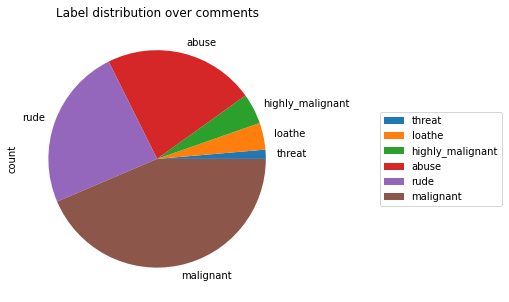

In [34]:
col = ['malignant', 'highly_malignant', 'loathe', 'rude', 'abuse', 'threat']

dist = df[col].sum()\
                    .to_frame()\
                    .rename(columns={0: 'count'})\
                    .sort_values('count')

dist.plot.pie(y = 'count',
                        title = 'Label distribution over comments',
                        figsize = (5, 5))\
                        .legend(loc = 'center left', bbox_to_anchor = (1.3, 0.5))

The most appearing bad words are in the 'malignant', 'rude' & 'abuse' column.

Bad words are very less in the following target variables: 'highly_malignant', 'loathe', 'threat'.

# Conversion of Text into Vectors

In [35]:
# Converting text into vectors using TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer

tf_vec = TfidfVectorizer(max_features = 10000, stop_words = 'english', smooth_idf = False)

features = tf_vec.fit_transform(df['comment_text'])

x = features

In [36]:
# Defining all target variables as y

y = hf.columns

# Model Building

In [37]:
# defining dataset for OneVsRestClassifier

x, y = make_classification(n_samples = 159571, n_features = 10, n_informative = 5, n_redundant = 5, n_classes = 6, random_state = 5)

In [38]:
# Splitting data into training and testing sets

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.20, random_state = 52)

We split our data into Training and Testing giving 80% data for Training and 20% for Testing at random state 52. We will use different algorithms for comparing accuracy metrics and attaining the best model. We will compare Logitic Regression, DecisionTreeClassifier, RandomForestClassifier, KNeighborsClassifier and AdaBoostClassifier in this case.

# Comparing Different Algorithms

# Logistic Regresion

In [39]:
# LogisticRegression

lgr = LogisticRegression(C=1, max_iter = 3000)

ovr = OneVsRestClassifier(lgr)

ovr.fit(x_train, y_train)

pred_train = ovr.predict(x_train)

print('Training accuracy is {}'.format(accuracy_score(y_train, pred_train)))

pred_test = ovr.predict(x_test)

print('Test accuracy is {}'.format(accuracy_score(y_test,pred_test)))

print(confusion_matrix(y_test,pred_test))

print(classification_report(y_test,pred_test))

Training accuracy is 0.43994015165757977
Test accuracy is 0.4366285445715181
[[2717  302 1113  897  100  131]
 [ 602 3230  189  149  478  621]
 [ 921  371 2639  483  259  669]
 [ 945   75  418 2090  677 1142]
 [ 406 1192 1432  250 1375  684]
 [ 361 1339  322 1049  403 1884]]
              precision    recall  f1-score   support

           0       0.46      0.52      0.48      5260
           1       0.50      0.61      0.55      5269
           2       0.43      0.49      0.46      5342
           3       0.42      0.39      0.41      5347
           4       0.42      0.26      0.32      5339
           5       0.37      0.35      0.36      5358

    accuracy                           0.44     31915
   macro avg       0.43      0.44      0.43     31915
weighted avg       0.43      0.44      0.43     31915



The training and testing accuracy for algorithm "LogisticRegression" is 43.99% and 43.66% respectively.

# DecisionTreeClassifier

In [40]:
# DecisionTreeClassifier

dt = DecisionTreeClassifier()

ovr1 = OneVsRestClassifier(dt)

ovr1.fit(x_train, y_train)

pred_train = ovr1.predict(x_train)

print('Training accuracy is {}'.format(accuracy_score(y_train, pred_train)))

pred_test = ovr1.predict(x_test)

print('Test accuracy is {}'.format(accuracy_score(y_test,pred_test)))

print(confusion_matrix(y_test,pred_test))

print(classification_report(y_test,pred_test))

Training accuracy is 1.0
Test accuracy is 0.7771580761397462
[[3640  182  299  337  104  698]
 [  74 4026  171  156  178  664]
 [ 138   68 4045  226  190  675]
 [ 145   79  110 3861  166  986]
 [  31  117   57   81 4296  757]
 [  48   76   33  161  105 4935]]
              precision    recall  f1-score   support

           0       0.89      0.69      0.78      5260
           1       0.89      0.76      0.82      5269
           2       0.86      0.76      0.80      5342
           3       0.80      0.72      0.76      5347
           4       0.85      0.80      0.83      5339
           5       0.57      0.92      0.70      5358

    accuracy                           0.78     31915
   macro avg       0.81      0.78      0.78     31915
weighted avg       0.81      0.78      0.78     31915



The training and testing accuracy for algorithm "DecisionTreeClassifier" is 100% and 77.71% respectively. This algorithm is performing better than Logistic model. We will check other models too.

# RandomForestClassifier

In [41]:
# RandomForestClassifier

rfc = RandomForestClassifier()

ovr2 = OneVsRestClassifier(rfc)

ovr2.fit(x_train, y_train)

pred_train = ovr2.predict(x_train)

print('Training accuracy is {}'.format(accuracy_score(y_train, pred_train)))

pred_test = ovr2.predict(x_test)

print('Test accuracy is {}'.format(accuracy_score(y_test,pred_test)))

print(confusion_matrix(y_test,pred_test))

print(classification_report(y_test,pred_test))

Training accuracy is 1.0
Test accuracy is 0.8821870593764688
[[4442  169  211  220  100  118]
 [  79 4816  119  118   73   64]
 [ 203   85 4739   92  139   84]
 [ 207  106  160 4479  127  268]
 [  28  153   71   90 4865  132]
 [  64  120   40  182  138 4814]]
              precision    recall  f1-score   support

           0       0.88      0.84      0.86      5260
           1       0.88      0.91      0.90      5269
           2       0.89      0.89      0.89      5342
           3       0.86      0.84      0.85      5347
           4       0.89      0.91      0.90      5339
           5       0.88      0.90      0.89      5358

    accuracy                           0.88     31915
   macro avg       0.88      0.88      0.88     31915
weighted avg       0.88      0.88      0.88     31915



The training and testing accuracy for algorithm "RandomForestClassifier" is 100% and 88.21% respectively. 100% training accuracy means that the model is overfitting, to resolve this issue, hyper parameter tuning needs to be performed. The accuracy, precision and f1-score of this model is quite good. Testing accuracy is satisfactory.

# KNeighborsClassifier

In [42]:
# KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=9)

ovr3 = OneVsRestClassifier(knn)

ovr3.fit(x_train, y_train)

pred_train = ovr3.predict(x_train)

print('Training accuracy is {}'.format(accuracy_score(y_train, pred_train)))

pred_test = ovr3.predict(x_test)

print('Test accuracy is {}'.format(accuracy_score(y_test,pred_test)))

print(confusion_matrix(y_test,pred_test))

print(classification_report(y_test,pred_test))

Training accuracy is 0.8914896283762612
Test accuracy is 0.8731630894563684
[[4331  184  251  244  134  116]
 [  53 4815  129  128   83   61]
 [ 177   96 4682  103  184  100]
 [ 186  103  176 4455  137  290]
 [  29  176   84  104 4801  145]
 [  52  142   37  188  156 4783]]
              precision    recall  f1-score   support

           0       0.90      0.82      0.86      5260
           1       0.87      0.91      0.89      5269
           2       0.87      0.88      0.88      5342
           3       0.85      0.83      0.84      5347
           4       0.87      0.90      0.89      5339
           5       0.87      0.89      0.88      5358

    accuracy                           0.87     31915
   macro avg       0.87      0.87      0.87     31915
weighted avg       0.87      0.87      0.87     31915



The training and testing accuracy for algorithm "KNeighborsClassifier" is 89.14% and 87.31% respectively. The accuracy of this model is a little less than RandomForestClassifier but still a satisfactory one.

# AdaBoostClassifier

In [43]:
# AdaBoostClassifier

adac = AdaBoostClassifier(n_estimators=100)

ovr4 = OneVsRestClassifier(adac)

ovr4.fit(x_train, y_train)

pred_train = ovr4.predict(x_train)

print('Training accuracy is {}'.format(accuracy_score(y_train, pred_train)))

pred_test = ovr4.predict(x_test)

print('Test accuracy is {}'.format(accuracy_score(y_test,pred_test)))

print(confusion_matrix(y_test,pred_test))

print(classification_report(y_test,pred_test))

Training accuracy is 0.6292614526540077
Test accuracy is 0.6258499138336205
[[3179  255  652  714  293  167]
 [ 171 3986  243  193  365  311]
 [ 573  385 3014  330  517  523]
 [ 308  191  310 3391  500  647]
 [ 175  457  293  357 3741  316]
 [ 241  653  343  833  625 2663]]
              precision    recall  f1-score   support

           0       0.68      0.60      0.64      5260
           1       0.67      0.76      0.71      5269
           2       0.62      0.56      0.59      5342
           3       0.58      0.63      0.61      5347
           4       0.62      0.70      0.66      5339
           5       0.58      0.50      0.53      5358

    accuracy                           0.63     31915
   macro avg       0.63      0.63      0.62     31915
weighted avg       0.63      0.63      0.62     31915



The training and testing accuracy for algorithm "AdaBoostClassifier" is 62.92% and 62.58% respectively. The accuracy of this model is less in comparison to the KNeighborsClassifier & RandomForestClassifier.

# Hyper Parameter Tuning with the best Accuracy

In [46]:
# RandomForestClassifier

rfc = RandomForestClassifier()

ovr5 = OneVsRestClassifier(rfc)

ovr5.fit(x_train, y_train)

pred_train = ovr5.predict(x_train)

print('Training accuracy = {}'.format(accuracy_score(y_train, pred_train)))

pred_test = ovr5.predict(x_test)

print('Test accuracy = {}'.format(accuracy_score(y_test,pred_test)))

cvs=cross_val_score(ovr5, x, y, cv = 10, scoring = 'accuracy').mean()

print('cross validation score :', cvs*100)

print(confusion_matrix(y_test, pred_test))

print(classification_report(y_test, pred_test))

Training accuracy = 1.0
Test accuracy = 0.8812470625097917
cross validation score : 88.13192975861945
[[4434  168  220  225   93  120]
 [  73 4829  116  119   71   61]
 [ 202   92 4731   98  135   84]
 [ 225  100  157 4465  127  273]
 [  32  156   70   95 4863  123]
 [  61  117   45  195  137 4803]]
              precision    recall  f1-score   support

           0       0.88      0.84      0.86      5260
           1       0.88      0.92      0.90      5269
           2       0.89      0.89      0.89      5342
           3       0.86      0.84      0.85      5347
           4       0.90      0.91      0.90      5339
           5       0.88      0.90      0.89      5358

    accuracy                           0.88     31915
   macro avg       0.88      0.88      0.88     31915
weighted avg       0.88      0.88      0.88     31915



The Training accuracy of Random Forest Classifier did not change after hypertuning the parameters but accuracy has decreased a bit, hence we choose the Random Forest Classifier model without hypertuning it.

'ovr2' gives best accuracy among all.

# Saving the Best Model

In [47]:
# Saving the best model

import pickle

filename = 'malignant_NEW.pkl'

pickle.dump(ovr2, open(filename, 'wb'))

# Testing Dataset

# Importing Test Data

In [48]:
# Importing data set

df1 = pd.read_csv('test.csv')

df1.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


Just like in train data set, column 'id' does not serve of any importance in making predictions since it is unique number for each entry, hence we drop the column. The text data can be seen to have a lot of redundant data.

In [49]:
# Checking shape of data set

df1.shape

(153164, 2)

Test data consists of 153164 rows and 2 columns.

In [50]:
# dropping of "id" column

df1.drop('id', axis = 1, inplace = True)

# Text Pre-Processing

In [51]:
# New column for Length of texts present in the "comment_text" column of the original dataframe

df1['length'] = df1['comment_text'].str.len()

df1.head(3)

,comment_text,length
0,Yo bitch Ja Rule is more succesful then you'll...,367
1,== From RfC == \n\n The title is fine as it is...,50
2,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",54


A new column 'length' is added to the data set depicting the length of text in each row.

# Converting all texts into lower case and unique data into text language to identify them

In [52]:
# Convert all messages to lower case

df1['comment_text'] = df1['comment_text'].str.lower()

# Replace email addresses with 'email'
df1['comment_text'] = df1['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'emailaddress')

# Replace URLs with 'webaddress'
df1['comment_text'] = df1['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')

# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
df1['comment_text'] = df1['comment_text'].str.replace(r'£|\$', 'dollers')
    
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
df1['comment_text'] = df1['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phonenumber')

    
# Replace numbers with 'numbr'
df1['comment_text'] = df1['comment_text'].str.replace(r'\d+(\.\d+)?', 'numbr')


# Removing Punctuations

In [53]:
# Defining punctuations and printing them

punc = string.punctuation

punc

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [54]:
# removing punctuations

df1['comment_text'] = df1['comment_text'].str.replace(r'[^\w\d\s]', ' ') #removing punctuations

In [55]:
# Visualizing data frame to check if the punctuations are removed

df1.head()

,comment_text,length
0,yo bitch ja rule is more succesful then you ll...,367
1,from rfc \n\n the title is fine as it is...,50
2,\n\n sources \n\n zawe ashton on lap...,54
3,if you have a look back at the source the in...,205
4,i don t anonymously edit articles at all,41


We can notice existance of '\n' in data. we will replace this with an empty string.

In [56]:
# removing \n

df1['comment_text'] = df1['comment_text'].str.replace('\n', ' ')

df1.head()

,comment_text,length
0,yo bitch ja rule is more succesful then you ll...,367
1,from rfc the title is fine as it is ...,50
2,sources zawe ashton on lapland...,54
3,if you have a look back at the source the in...,205
4,i don t anonymously edit articles at all,41


It is observed that \n values are removed from data set.

# Removing Stopwords

In [57]:
# Setting our own stopwords

stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])

In [58]:
# stopwords removal

df1['comment_text'] = df1['comment_text'].apply(lambda x: ' '.join(
    word for word in x.split() if word not in stop_words and len(word)>2))

In [59]:
# Verifying modifications

df1.head()

,comment_text,length
0,bitch rule succesful ever whats hating sad mof...,367
1,rfc title fine imo,50
2,sources zawe ashton lapland,54
3,look back source information updated correct f...,205
4,anonymously edit articles,41


When compared with the old data frame, we can notice that the stopwords and the words less than length 2 have been removed from the texts present in the column 'comment_text'.

# Tokenization and Lemmatization of Texts

In [60]:
lemma = WordNetLemmatizer()

df1['comment_text'] = df1['comment_text'].apply(lambda x: ' '.join(
 lemma.lemmatize(i) for i in x.split()))

# Creating new length of texts present in data set

In [61]:
# Creating column for length of modified texts

df1['clean_length'] = df1.comment_text.str.len()

df1.head()

,comment_text,length,clean_length
0,bitch rule succesful ever whats hating sad mof...,367,215
1,rfc title fine imo,50,18
2,source zawe ashton lapland,54,26
3,look back source information updated correct f...,205,109
4,anonymously edit article,41,24


# Comparing Original & New length of texts

In [62]:
# Total length removal

print ('Original Length', df1.length.sum())

print ('Clean Length', df1.clean_length.sum())

Original Length 55885733
Clean Length 34970668


Clean length is 62.5% of the Original length.

# Conversion of Text into Vectors

In [63]:
# Converting text into vectors using TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer

tf_vec = TfidfVectorizer(max_features = 10, stop_words = 'english', smooth_idf = False)

features = tf_vec.fit_transform(df1['comment_text'])

x = features

# Loading the Best Saved Model

In [64]:
# Loading model

import pickle

fitted_model=pickle.load(open('malignant_NEW.pkl','rb'))

In [65]:
# Verifying the saved model

fitted_model

OneVsRestClassifier(estimator=RandomForestClassifier())

# Predicting The Test File using the Pre Saved Model

In [66]:
# Prediction over test data

predictions = fitted_model.predict(x)

In [67]:
predictions

array([3, 3, 3, ..., 3, 1, 1])

In [68]:
# Finding accuracy on test data

fitted_model = pickle.load(open('malignant_NEW.pkl','rb'))

result=fitted_model.score(x_test,y_test)

print(result)

0.8821870593764688


# Conclusion

In [69]:
# Comparing original results with predicted results

conclusion = pd.DataFrame([fitted_model.predict(x_test)[:], pred_test[:]], index = ['Predicted','Original'])

conclusion

,0,1,2,3,4,5,6,7,8,9,...,31905,31906,31907,31908,31909,31910,31911,31912,31913,31914
Predicted,0,4,5,3,1,5,4,5,1,5,...,3,3,2,4,4,1,5,3,4,1
Original,0,4,5,3,1,5,4,5,3,5,...,3,3,2,4,4,1,5,3,4,1


# Creating DataFrame of the Predicted Values

In [70]:
# Using 'Result' as the column name and equating it to the list

#Adding a new column of predicted results to the data frame 

df1['Result'] = predictions

df1

,comment_text,length,clean_length,Result
0,bitch rule succesful ever whats hating sad mof...,367,215,3
1,rfc title fine imo,50,18,3
2,source zawe ashton lapland,54,26,3
3,look back source information updated correct f...,205,109,3
4,anonymously edit article,41,24,3
...,...,...,...,...
153159,totally agree stuff nothing long crap,60,37,3
153160,throw field home plate get faster throwing cut...,198,107,3
153161,okinotorishima category see change agree corre...,423,238,3
153162,one founding nation germany law return quite s...,502,316,1


Since the data pre-processing is already done, we do not need the columns 'length' and 'clean_length' to save our final predicted outputs. Hence, we drop them.

In [71]:
#dropping of 'length' and 'clean_length' columns

df1.drop('length', axis = 1, inplace = True)

df1.drop('clean_length', axis = 1, inplace = True)

df1.head()

,comment_text,Result
0,bitch rule succesful ever whats hating sad mof...,3
1,rfc title fine imo,3
2,source zawe ashton lapland,3
3,look back source information updated correct f...,3
4,anonymously edit article,3


In [72]:
# Use string label instead

df1['Result'] = df1.Result.replace(dict(enumerate(hf.columns)))

df1

,comment_text,Result
0,bitch rule succesful ever whats hating sad mof...,threat
1,rfc title fine imo,threat
2,source zawe ashton lapland,threat
3,look back source information updated correct f...,threat
4,anonymously edit article,threat
...,...,...
153159,totally agree stuff nothing long crap,threat
153160,throw field home plate get faster throwing cut...,threat
153161,okinotorishima category see change agree corre...,threat
153162,one founding nation germany law return quite s...,highly_malignant


# Saving Excel Sheet of the DataFrame

In [73]:
# determining the name of the file

file_name = 'malignant_result.xlsx'
  
# saving the excel

df1.to_excel(file_name)